### Reading data

In [2]:
import pandas as pd
import numpy as np 

# read the data set into a pandas dataframe
f500 = pd.read_csv("f500.csv", index_col=0)
f500.index.name = None

# replace 0 values in the "previous_rank" column with NaN
f500.loc[f500["previous_rank"] == 0, "previous_rank"] = np.nan

f500_selection = f500[['rank','revenues','revenue_change']].head(5)

Without index_col = 0

In [3]:
f500 = pd.read_csv('f500.csv')

f500.loc[f500['previous_rank'] == 0, 'previous_rank'] = np.nan

### `iloc`

Recall that when we worked with a dataframe with string index labels, we used `loc[]` to select data:

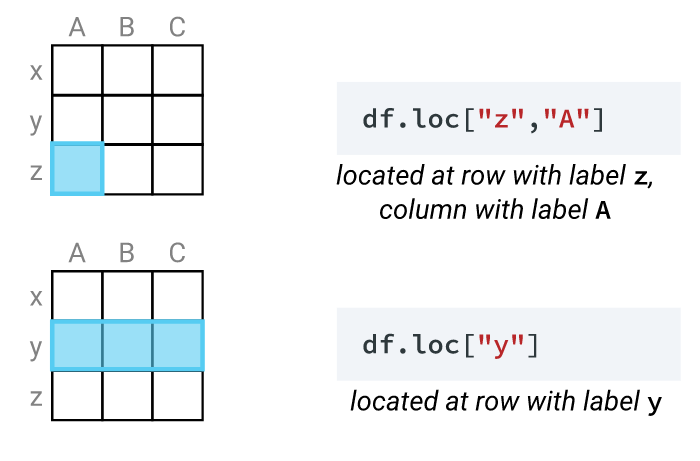

In some scenarios, using labels to make selections makes things easier — in others though, it makes things harder.

Just like in NumPy, we can also use integer positions to select data using `Dataframe.iloc[]` and `Series.iloc[]`. It's easy to get `loc[]` and `iloc[]` confused at first, but the easiest way is to remember the first letter of each method:

- `loc`: label based selection
- `iloc`: integer position based selection

Using `iloc[]` is almost identical to indexing with NumPy, with integer positions starting at 0 like ndarrays and Python lists. Let's look at how we would perform the selection above using `iloc[]`:

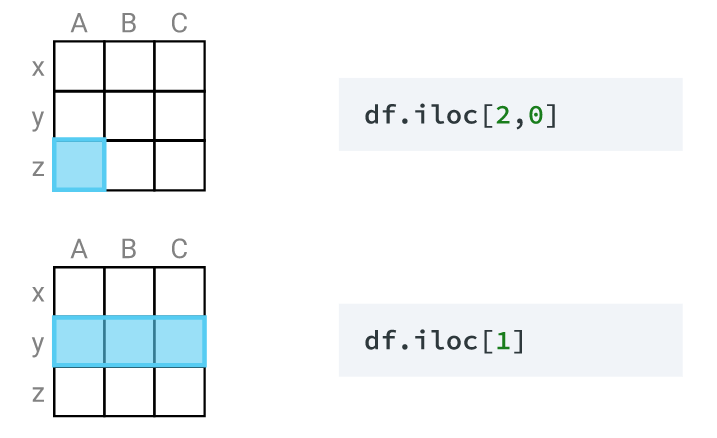

The full syntax for `DataFrame.iloc[]`, in pseudocode, is:

```
df.iloc[row_index, column_index]
```

In [4]:
fifth_row = f500.iloc[4]
company_value = f500.loc[0,'company']

### Slicing...

In [5]:
first_column = f500.iloc[:,0]
print(first_column)

0                             Walmart
1                          State Grid
2                       Sinopec Group
3            China National Petroleum
4                        Toyota Motor
                    ...              
495    Teva Pharmaceutical Industries
496          New China Life Insurance
497         Wm. Morrison Supermarkets
498                               TUI
499                        AutoNation
Name: company, Length: 500, dtype: object


To specify a positional slice, we can take advantage of the same shortcut that we use with labels. Here's how we would select the rows between index positions one to four (inclusive):

In [7]:
second_to_sixth_rows = f500[1:5]
second_to_sixth_rows

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
1,State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2.0,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456
2,Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4.0,China,"Beijing, China",http://www.sinopec.com,19,713288,106523
3,China National Petroleum,4,262573,-12.3,1867.5,585619,-73.7,Zhang Jianhua,Petroleum Refining,Energy,3.0,China,"Beijing, China",http://www.cnpc.com.cn,17,1512048,301893
4,Toyota Motor,5,254694,7.7,16899.3,437575,-12.3,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts,8.0,Japan,"Toyota, Japan",http://www.toyota-global.com,23,364445,157210


In the example above, the row at index position `5` is not included, just as if we were slicing with a Python list or NumPy ndarray. Recall that `loc[]` handles slicing differently:

- With `loc[]`, the ending slice is **included**.
- With `iloc[]`, the ending slice is **not included**.

The table below summarizes how we can use `DataFrame.iloc[]` and `Series.iloc[]` to select by integer position:

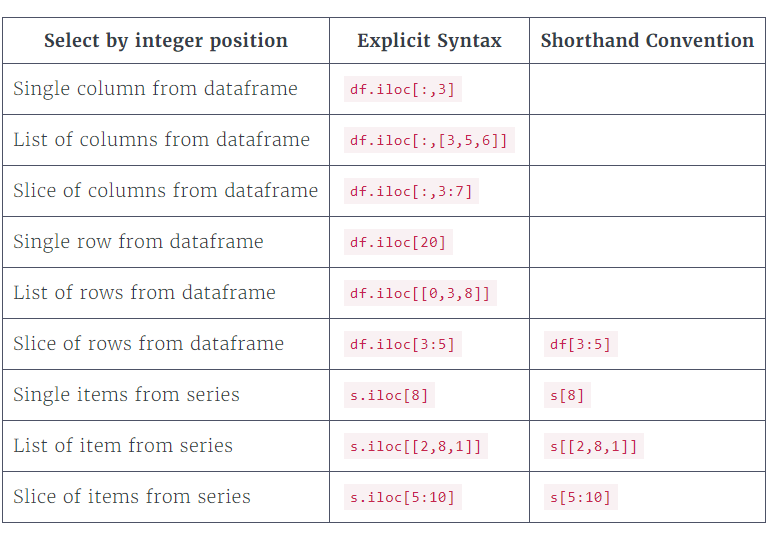

In [8]:
first_three_rows = f500.head(3)

first_seventh_row_slice = f500.iloc[[0,6], 0:5]

### Using pandas methods to create boolean masks

#### `Series.isnull()`

Let's use the Series.isnull() method to view rows with null values in the revenue_change column:

In [9]:
rev_is_null = f500["revenue_change"].isnull()
print(rev_is_null.head())

0    False
1    False
2    False
3    False
4    False
Name: revenue_change, dtype: bool


 Just like in NumPy, we can use this series to filter our dataframe, f500:

In [10]:
rev_change_null = f500[rev_is_null]
print(rev_change_null[["company","country","sector"]])

                        company  country      sector
90                       Uniper  Germany      Energy
180  Hewlett Packard Enterprise      USA  Technology


Let's find the null values in the previous_rank column next.

In [13]:
mask = f500['previous_rank'].isnull()
null_previous_rank = f500.loc[mask, ['company','rank','previous_rank']]
null_previous_rank.head(3)

,company,rank,previous_rank
48,Legal & General Group,49,NaN
90,Uniper,91,NaN
123,Dell Technologies,124,NaN


Above, we can see that index axis labels for this selection are 48, 90, and 123.

If we wanted to select the first company from our new null_previous_rank dataframe by integer position, we can use DataFrame.iloc[]:

In [14]:
first_null_prev_rank = null_previous_rank.iloc[0]

print(first_null_prev_rank)

company          Legal & General Group
rank                                49
previous_rank                      NaN
Name: 48, dtype: object


Let's see what happens when we use DataFrame.loc[] instead of DataFrame.iloc[]:

In [15]:
first_null_prev_rank = null_previous_rank.loc[0]

KeyError: 0

Because there is no row with a 0 label in the index, we got the error above. If we wanted to select a row using loc[], we'd have to use the integer label for the first row — 48.

Always think carefully about whether you want to select by label or integer position. Use DataFrame.loc[] or DataFrame.iloc[] accordingly.

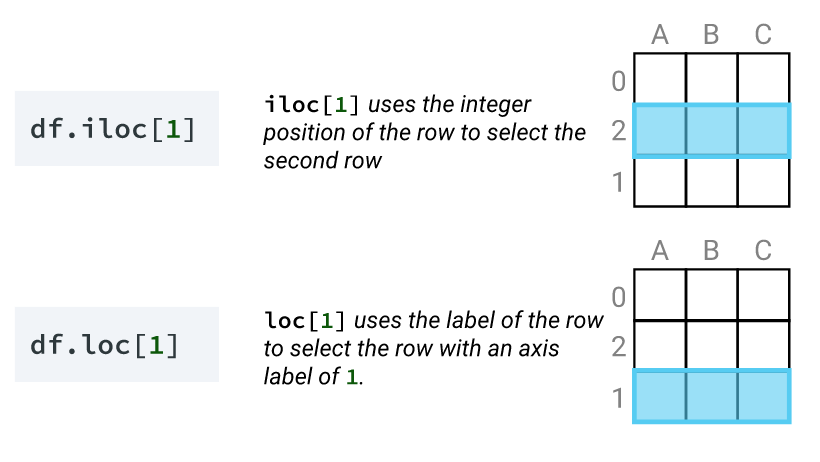

### `Series.notnull()`

Now that we've identified the rows with null values in the previous_rank column, let's use the Series.notnull() method to exclude them from the next part of our analysis.

In [17]:
previously_ranked = f500[f500["previous_rank"].notnull()]

We can then create a rank_change column by subtracting the rank column from the previous_rank column:

In [18]:
rank_change = previously_ranked["previous_rank"] - previously_ranked["rank"]
print(rank_change.shape)
print(rank_change.tail(3))

(467,)
496   -70.0
497   -61.0
498   -32.0
dtype: float64


Above, we can see that our rank_change series has 467 rows. Since the last integer index label is 498, we know that our index labels no longer align with the integer positions.

Suppose now we decided to add the rank_change series to the f500 dataframe as a new column. Its index labels no longer match the index labels in f500, so how could this be done?

#### Index alignment

Another powerful aspect of pandas is that almost every operation will align on the index labels. Let's look at an example – below we have a dataframe named food and a series named alt_name:

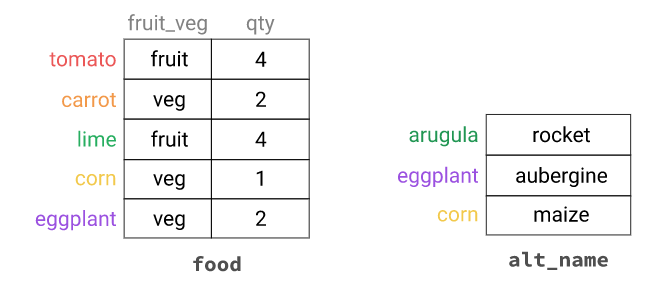


The food dataframe and the alt_name series not only have a different number of items, but they also only have two of the same index labels - corn and eggplant - and they're in different orders. If we wanted to add alt_name as a new column in our food dataframe, we can use the following code:

```
food["alt_name"] = alt_name
```

When we do this, pandas will ignore the order of the alt_name series, and align on the index labels:

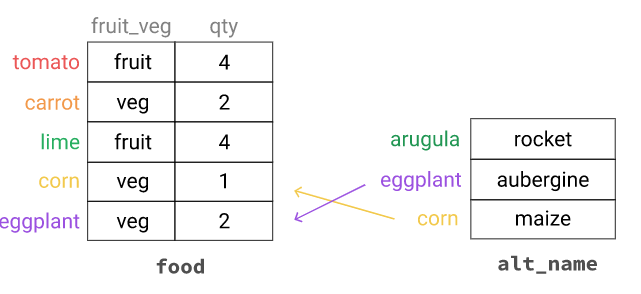

Pandas will also:

- Discard any items that have an index that doesn't match the dataframe (like arugula).
- Fill any remaining rows with NaN.

Below is the result:

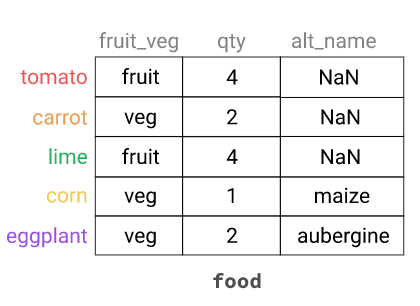

The pandas library will align on index at every opportunity, no matter if our index labels are strings or integers - this makes working with data from different sources or working with data when we have removed, added, or reordered rows much easier than it would be otherwise.

### Using boolean operators

To answer more complex questions, we need to learn how to combine boolean arrays.

We combine boolean arrays using **boolean operators**. In Python, these boolean operators are and, or, and not. In pandas, the operators are slightly different:

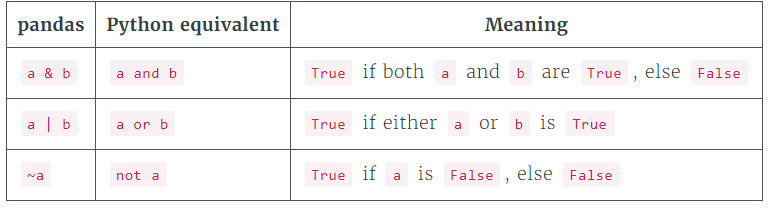

Let's look at an example using f500_sel, a small selection of our f500 dataframe:

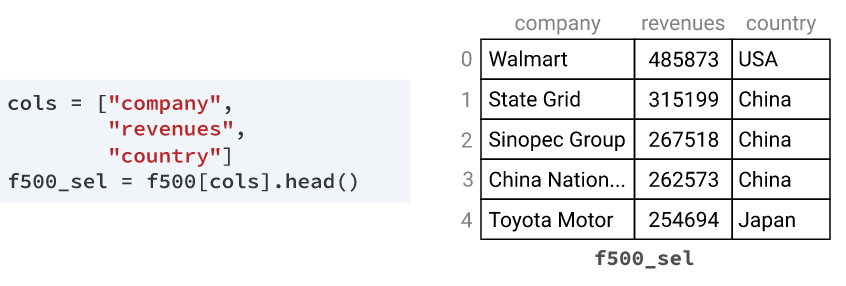

Suppose we wanted to find the companies in f500_sel with more than 265 billion in revenue that are headquartered in China. We'll start by performing two boolean comparisons to produce two separate boolean arrays (the revenue column is already in millions).

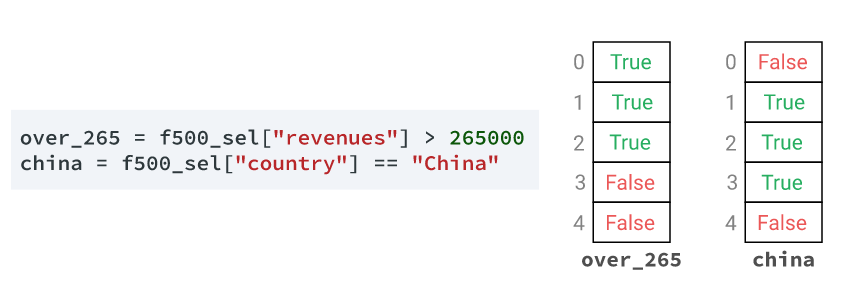

We then use the & operator to combine the two boolean arrays using boolean "and" logic:

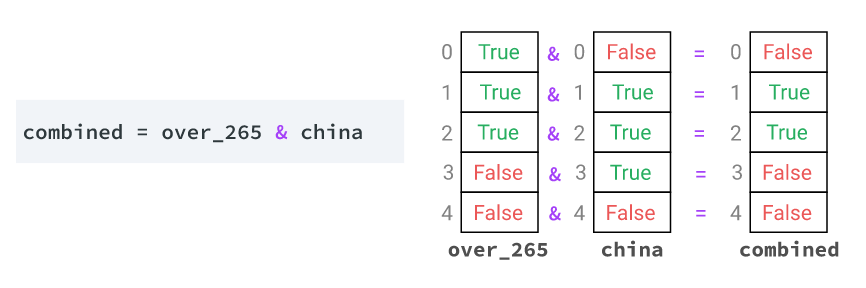


Lastly, we use the combined boolean array to perform selection on our dataframe:

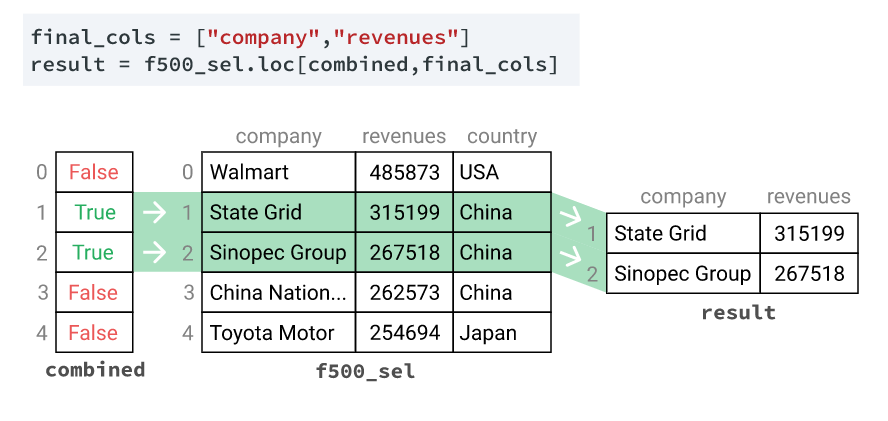

The result gives us two companies from f500_sel that are both Chinese and have over 265 billion in revenue.

**Another example:**

Companies that have both over 100 billion in revenue and negative profits:

In [19]:
large_revenue = f500["revenues"] > 100000
negative_profits = f500["profits"] < 0
combined = large_revenue & negative_profits
big_rev_neg_profit = f500[combined]

Just like when we use a single boolean array to perform selection, we don't need to use intermediate variables. The first place we can optimize our code is by combining our two boolean arrays in a single line, instead of assigning them to the intermediate large_revenue and negative_profits variables first:

In [20]:
combined = (f500["revenues"] > 100000) & (f500["profits"] < 0)

Notice that we used parentheses around each of our boolean comparisons. This is very important — **our boolean operation will fail without parentheses.**

Lastly, instead of assigning the boolean arrays to combined, we can insert the comparison directly into our selection:

In [21]:
big_rev_neg_profit = f500[(f500["revenues"] > 100000) & (f500["profits"] < 0)]

Select the first five companies in the Technology sector for which the country is not the USA from the f500 dataframe. 

In [22]:
tech_outside_usa = f500[(f500['country'] != 'USA') & (f500['sector'] == 'Technology')].head()
tech_outside_usa

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
14,Samsung Electronics,15,173957,-2.0,19316.5,217104,16.8,Oh-Hyun Kwon,"Electronics, Electrical Equip.",Technology,13.0,South Korea,"Suwon, South Korea",http://www.samsung.com,23,325000,154376
26,Hon Hai Precision Industry,27,135129,-4.3,4608.8,80436,-0.4,Terry Gou,"Electronics, Electrical Equip.",Technology,25.0,Taiwan,"New Taipei City, Taiwan",http://www.foxconn.com,13,726772,33476
70,Hitachi,71,84558,1.2,2134.3,86742,48.8,Toshiaki Higashihara,"Electronics, Electrical Equip.",Technology,79.0,Japan,"Tokyo, Japan",http://www.hitachi.com,23,303887,26632
82,Huawei Investment & Holding,83,78511,24.9,5579.4,63837,-5.0,Ren Zhengfei,Network and Other Communications Equipment,Technology,129.0,China,"Shenzhen, China",http://www.huawei.com,8,180000,20159
104,Sony,105,70170,3.9,676.4,158519,-45.1,Kazuo Hirai,"Electronics, Electrical Equip.",Technology,113.0,Japan,"Tokyo, Japan",http://www.sony.net,23,128400,22415


### Sorting Values

Suppose we wanted to find the company that employs the most people in China. We can accomplish this by first selecting all of the rows where the country column equals China:

In [23]:
selected_rows = f500[f500["country"] == "China"]

Then, we can use the DataFrame.sort_values() method to sort the rows on the employees column. To do so, we pass the column name to the method:

In [25]:
sorted_rows = selected_rows.sort_values("employees")
sorted_rows[["company", "country", "employees"]].head()

,company,country,employees
204,Noble Group,China,1000
458,Yango Financial Holding,China,10234
438,China National Aviation Fuel Group,China,11739
128,Tewoo Group,China,17353
182,Amer International Group,China,17852


By default, the sort_values() method will sort the rows in ascending order — from smallest to largest.

To sort the rows in descending order instead, so the company with the largest number of employees appears first, we can set the ascending parameter to False:

In [26]:
sorted_rows = selected_rows.sort_values("employees", ascending=False)

print(sorted_rows[["company", "country", "employees"]].head())

                        company country  employees
3      China National Petroleum   China    1512048
118            China Post Group   China     941211
1                    State Grid   China     926067
2                 Sinopec Group   China     713288
37   Agricultural Bank of China   China     501368


Let's find the Japanese company with the most employees next.

In [28]:
sorted_employess_japan = f500[f500['country'] == 'Japan'].sort_values('employees', ascending = False)

top_japanese_employer = sorted_employess_japan['company'].iloc[0]

top_japanese_employer

'Toyota Motor'

### Using loops in pandas.

We've explicitly avoided using loops in pandas because one of the key benefits of pandas is that it has vectorized methods to work with data more efficiently. We'll learn more advanced techniques in later courses, but for now, we'll learn how to use loops for **aggregation**.

Aggregation is where we apply a statistical operation to groups of our data. Let's say that we wanted to calculate the average revenue for each country in the data set. Our process might look like this:

- Identify each unique country in the data set.
- For each country:
    - Select only the rows corresponding to that country.
    - Calculate the average revenue for those rows.
   
To identify the unique countries, we can use the Series.unique() method. This method returns an array of unique values from any series. Then, we can loop over that array and perform our operation. Here's what that looks like:

In [32]:
# Create an empty dictionary to store the results
avg_rev_by_country = {}

# Create an array of unique countries
countries = f500["country"].unique()

# Use a for loop to iterate over the countries
for c in countries:
    # Use boolean comparison to select only rows that
    # correspond to a specific country
    selected_rows = f500[f500["country"] == c]
    # Calculate the mean average revenue for just those rows
    mean = selected_rows["revenues"].mean()
    # Assign the mean value to the dictionary, using the
    # country name as the key
    avg_rev_by_country[c] = mean
    
avg_rev_by_country

{'USA': 64218.371212121216,
 'China': 55397.880733944956,
 'Japan': 53164.03921568627,
 'Germany': 63915.0,
 'Netherlands': 61708.92857142857,
 'Britain': 51588.708333333336,
 'South Korea': 49725.6,
 'Switzerland': 51353.57142857143,
 'France': 55231.793103448275,
 'Taiwan': 46364.666666666664,
 'Singapore': 54454.333333333336,
 'Italy': 51899.57142857143,
 'Russia': 65247.75,
 'Spain': 40600.666666666664,
 'Brazil': 52024.57142857143,
 'Mexico': 54987.5,
 'Luxembourg': 56791.0,
 'India': 39993.0,
 'Malaysia': 49479.0,
 'Thailand': 48719.0,
 'Australia': 33688.71428571428,
 'Belgium': 45905.0,
 'Norway': 45873.0,
 'Canada': 31848.0,
 'Ireland': 32819.5,
 'Indonesia': 36487.0,
 'Denmark': 35464.0,
 'Saudi Arabia': 35421.0,
 'Sweden': 27963.666666666668,
 'Finland': 26113.0,
 'Venezuela': 24403.0,
 'Turkey': 23456.0,
 'U.A.E': 22799.0,
 'Israel': 21903.0}

## Challenge: Calculating return on assets by country.

In this challenge we're going to add a new column to our dataframe, and then perform some aggregation using that new column.

The column we create is going to contain a metric called return on assets (ROA). ROA is a business-specific metric which indicates a company's ability to make profit using their available assets.

$$return\ on\ assets = \frac{profit}{assets}$$


Once we've created the new column, we'll aggregate by sector, and find the company with the highest ROA from each sector.

In [43]:
f500['ROA'] = f500['profits'] / f500['assets']

sectors = f500['sector'].unique() 
sectors_roa = {}

for s in sectors:
    companies_in_sector = f500['sector'] == s
    sorted_roa = f500.loc[companies_in_sector, ['company','ROA', 'sector']].sort_values(by = 'ROA', ascending = False)
    #print(sorted_roa)
    sectors_roa[s] = sorted_roa['company'].iloc[0]

In [44]:
sectors_roa

{'Retailing': 'H & M Hennes & Mauritz',
 'Energy': 'National Grid',
 'Motor Vehicles & Parts': 'Subaru',
 'Financials': 'Berkshire Hathaway',
 'Technology': 'Accenture',
 'Wholesalers': 'McKesson',
 'Health Care': 'Gilead Sciences',
 'Telecommunications': 'KDDI',
 'Engineering & Construction': 'Pacific Construction Group',
 'Industrials': '3M',
 'Food & Drug Stores': 'Publix Super Markets',
 'Aerospace & Defense': 'Lockheed Martin',
 'Food, Beverages & Tobacco': 'Philip Morris International',
 'Household Products': 'Unilever',
 'Transportation': 'Delta Air Lines',
 'Materials': 'CRH',
 'Chemicals': 'LyondellBasell Industries',
 'Media': 'Disney',
 'Apparel': 'Nike',
 'Hotels, Restaurants & Leisure': 'McDonald’s',
 'Business Services': 'Adecco Group'}